# Course 1 Task 2 Notebook

## POA Step 3: In-Depth Analysis: Machine Learning: Train/Test Split Method

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree

%matplotlib inline

In [2]:
data = pd.read_csv("Demographic_Data.csv")

In [3]:
# original dataset (preprocessed) -- needs to be preprocessed

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
# code validation -- necessary for ascertaining further preprocessing requirements 

# the dataset needs to be preprocessed to remove duplicated values 

data.duplicated().value_counts()

False    79979
True        21
dtype: int64

In [5]:
# code validation -- necessary for ascertaining further preprocessing requirements 

data = data.drop_duplicates()

data.duplicated().value_counts()

False    79979
dtype: int64

In [6]:
# code validation -- necessary for ascertaining further preprocessing requirements 

data.isnull().value_counts()

in-store  age    items  amount  region
False     False  False  False   False     79979
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


# Using "region" as the depedent variable

In [8]:
# only the independent variables are features, so we have to utilize "in-store", "age", "items" and "amount"

# the "region" column is a depedent variable

# features

X = data.iloc[:,0:4]
print("Summary of feature sample")
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [9]:
# dependent variable

# what the method is trying to predict (the values of this variable)

y = data["region"]

In [10]:
# Train/Test Split

# creation of two metric values which will be compared --- important for the comparision of "train loss" and "test loss" 

# loss = accuracy score (%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [11]:
#Modeling (Classification)

# the method (Decision Tree Classifier) which will be used to parse and predict the test depedent variable values from 
# the test features values 
algo = DecisionTreeClassifier()

# the constructed model

model = algo.fit(X_train, y_train)

In [12]:
# what the method predicts the test depedent variable to be based on the test indepedent variables 

preds = model.predict(X_test)

In [13]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.39      0.39      0.39      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.37      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



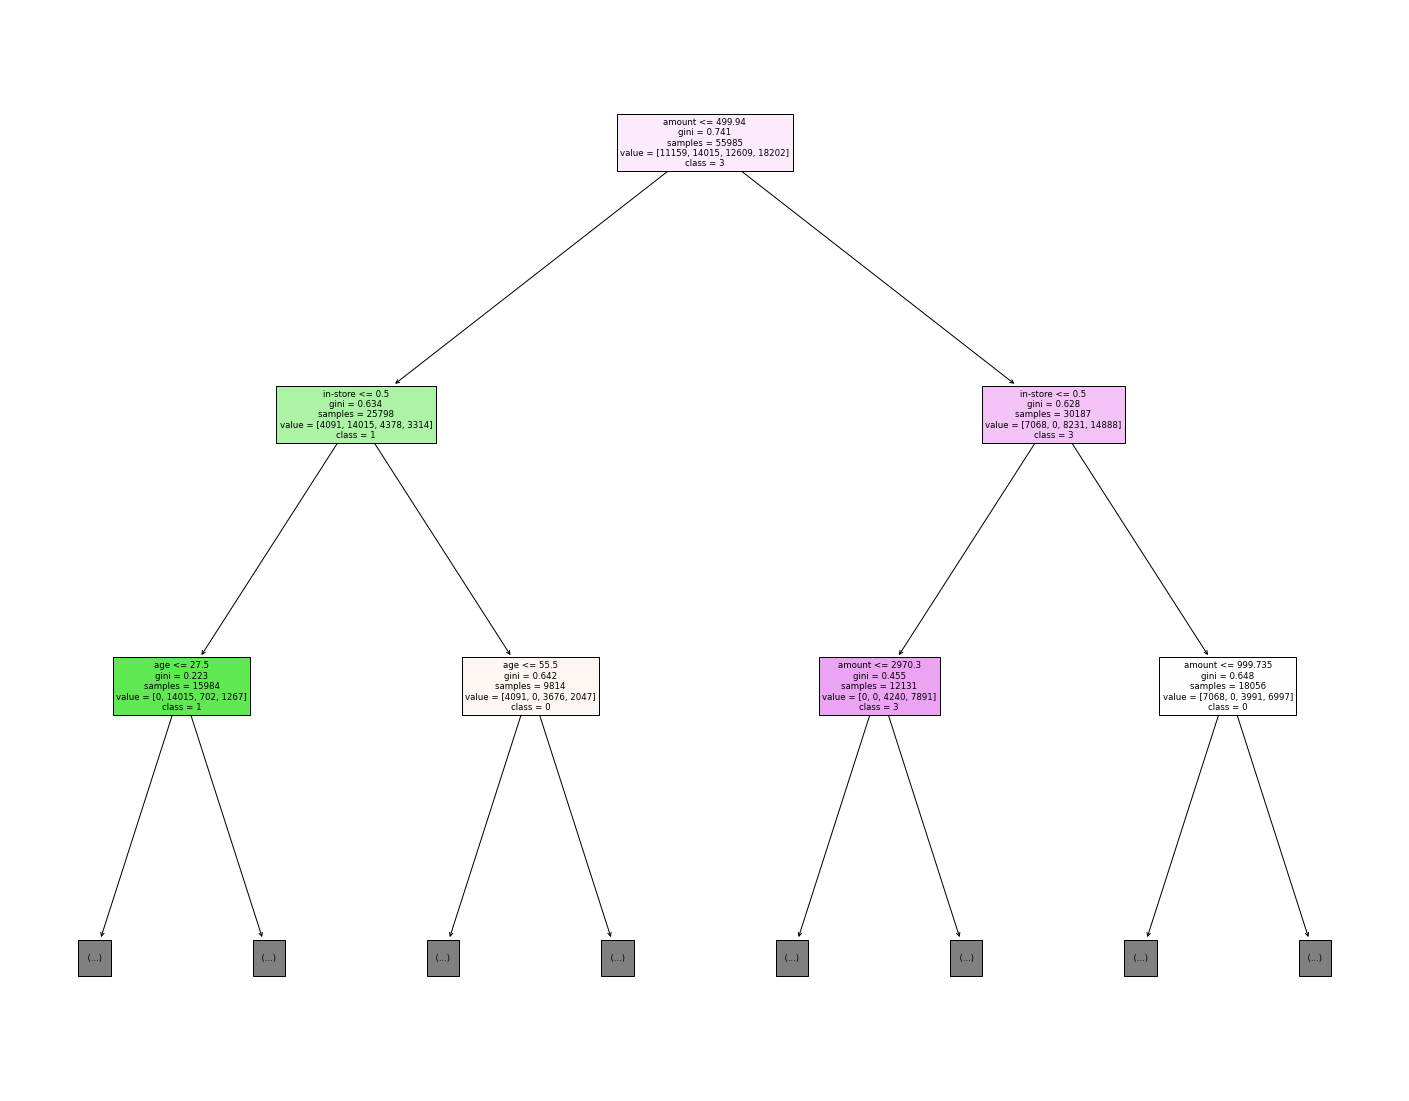

In [14]:
# creates a visualization of the Decision Tree 

# while this visualization may not be shared with end-users, it will be used to create a "story" which the Data Analyst
# must speak of

fig = plt.figure(figsize=(25,20))

tree = plot_tree(model, feature_names=X.columns, class_names=["0", "1", "2", "3"], filled=True, max_depth=2)

In [ ]:
# Model: RandomForestClassifier

In [ ]:
# Model: GradientBoostingClassifier

# Using "age" as the depedent variable

In [78]:
# must readjust the "feature space" so as to avoid over-fitting and incorrect Model development(s)

# removes the dependent variable ("age") from the training data (indepedent variables/features)
 
X = data.iloc[:,[0, 2, 3, 4]]
X.head()

,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [79]:
# validating code --- prior to discretizing the "age" variable / adding a new variable to the dataset

data.isnull().sum()

in-store      0
age           0
items         0
amount        0
region        0
age_bin       0
amount_bin    0
dtype: int64

In [80]:
# discretizing a continous numerical variable (like "age" or "amount") makes that modified variable into a categorical discrete variable 
# this is necessary for Classification models

# this is how the depedent variable is created (through discretization)

In [81]:
# this code WILL NOT work -- returns a "NaN" error message when the model is being created (the model cannot be created)

# this is because of how the "bins" parameter is designed: it necessarily creates null values because the current configuration
# does not properly capture the range of "age" values from the data

# data["age_bin"] = pd.cut(x=data["age"], bins=[10, 20, 30, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4, 5, 6])

In [83]:
# this code WILL work -- no error message and no issue with the model being constructed

# using this version of the code will result in a slightly different classification report due to how the "bins" parameter is
# changed

# data["age_bin"] = pd.cut(x=data["age"], bins=7, labels=[0, 1, 2, 3, 4, 5, 6])


In [84]:
# bins and labels have been modified to properly capture the full range of age values (18 to 85)

# discretizes the "age" variable to change it from continous numerical to categorical discrete 

data["age_bin"] = pd.cut(data["age"], bins=8, labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"])

In [86]:
#this can be ignored -- just some EDA stuff

# data[["age", "age_bin", "age_bracket"]].groupby("age_bin").count()

In [87]:
y = data["age_bin"]

In [88]:
# Train/Test Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [89]:
# Modeling (Classification)

algo = DecisionTreeClassifier()

model = algo.fit(X_train, y_train)

# Predictions

preds = model.predict(X_test)

# Creates and then displays the Classification Report for the given Model

print(classification_report(y_test, preds, zero_division=True))

              precision    recall  f1-score   support

       10-20       0.18      0.17      0.18      2700
       20-30       0.17      0.18      0.18      4003
       30-40       0.20      0.20      0.20      4725
       40-50       0.18      0.18      0.18      4210
       50-60       0.16      0.16      0.16      3427
       60-70       0.15      0.14      0.14      2502
       70-80       0.11      0.11      0.11      1502
       80-90       0.16      0.16      0.16       925

    accuracy                           0.17     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.17      0.17      0.17     23994



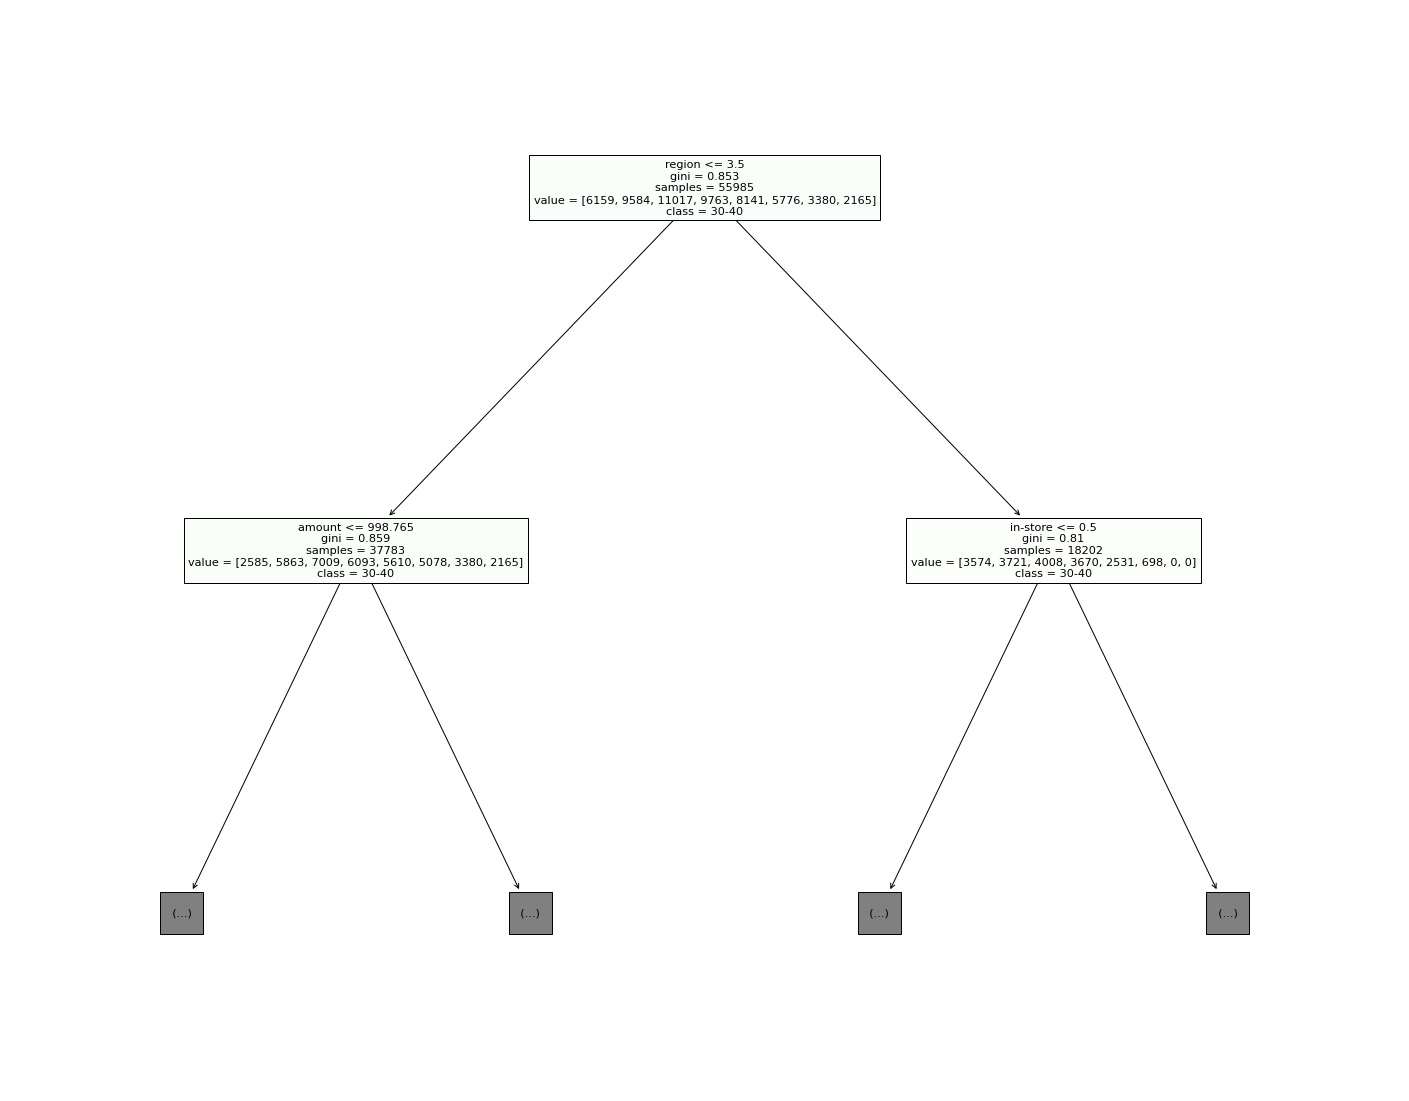

In [90]:
# Creates and then displays a plot of the Decision Tree

# note: it is not possible to display a plot when the model is RandomForestClassifier

# note: it is possible to display a plot when the model is GradientBoostingClassifier, but only the last iteration (the final tree)

fig = plt.figure(figsize=(25,20))

tree = plot_tree(model, feature_names=X.columns, class_names=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"], filled=True, max_depth=1)

### Model: RandomForestClassifier 

In [92]:
algo = RandomForestClassifier(n_estimators=5)

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds, zero_division=True))

              precision    recall  f1-score   support

       10-20       0.18      0.19      0.18      2700
       20-30       0.17      0.19      0.18      4003
       30-40       0.19      0.20      0.20      4725
       40-50       0.17      0.17      0.17      4210
       50-60       0.15      0.15      0.15      3427
       60-70       0.14      0.14      0.14      2502
       70-80       0.12      0.11      0.11      1502
       80-90       0.16      0.14      0.15       925

    accuracy                           0.17     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.17      0.17      0.17     23994



### Model: GradientBoosting Classifier

In [95]:
algo = GradientBoostingClassifier()

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds, zero_division=True))

              precision    recall  f1-score   support

       10-20       0.19      0.10      0.13      2700
       20-30       0.21      0.11      0.14      4003
       30-40       0.20      0.67      0.31      4725
       40-50       0.20      0.05      0.07      4210
       50-60       0.17      0.04      0.06      3427
       60-70       0.15      0.10      0.12      2502
       70-80       0.13      0.01      0.02      1502
       80-90       0.16      0.17      0.16       925

    accuracy                           0.19     23994
   macro avg       0.18      0.16      0.13     23994
weighted avg       0.19      0.19      0.14     23994



# Using "amount" as a depedent variable

In [198]:
# it is fundamental that the "feature space" be adjusted (modified and re-instantiated)
# when new dependent variables are being used for model development

# if the training data (X) variable is not adjusted, this will lead to classification reports that show 100% accuracy
# which is both practically impossible and incorrect 

# this problem happens because the model is using the same training data it has already parsed, which means that it will
# simply "memorize" the data, leading to an over-fit problem

# Over-fitting generally should not happen in models that deal with Classification, as the depedent variables are
# always categorical and discrete. 

# Over-fitting generally is more likely to occur in models that deal with Regression, as the dependent variables are
# always continuous and numeric.

X = data.iloc[:,[0, 1, 2, 4]]
X.head()

,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [199]:
# discretizes the "amount" variable which turns it from a continuous numerical variable to a categorical discrete variable

# 

data["amount_bin"] = pd.cut(data["amount"], bins=10, labels=["$0-300", "$300-600", "$600-900", "$900-1200", "$1200-1500", "$1500-1800", "$1800-2100", "$2100-2400", "$2400-2700", "$2700-3000"])

y = data["amount_bin"]

In [159]:
# data["amount_bin"] = pd.cut(data["amount"], bins=3, labels=["0-1000", "1000-2000", "2000-3000"])

# changing the bin parameter affects the accuracy scores of the model

# y = data["amount_bin"]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [201]:
algo = DecisionTreeClassifier()

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds, zero_division=True))


              precision    recall  f1-score   support

      $0-300       0.47      0.59      0.52      6533
  $1200-1500       0.13      0.18      0.15      1522
  $1500-1800       0.13      0.12      0.12      1569
  $1800-2100       0.10      0.07      0.08      1215
  $2100-2400       0.10      0.09      0.09       600
  $2400-2700       0.10      0.09      0.10       607
  $2700-3000       0.11      0.10      0.10       598
    $300-600       0.25      0.22      0.23      5691
    $600-900       0.23      0.23      0.23      3474
   $900-1200       0.14      0.07      0.09      2185

    accuracy                           0.28     23994
   macro avg       0.18      0.18      0.17     23994
weighted avg       0.26      0.28      0.27     23994



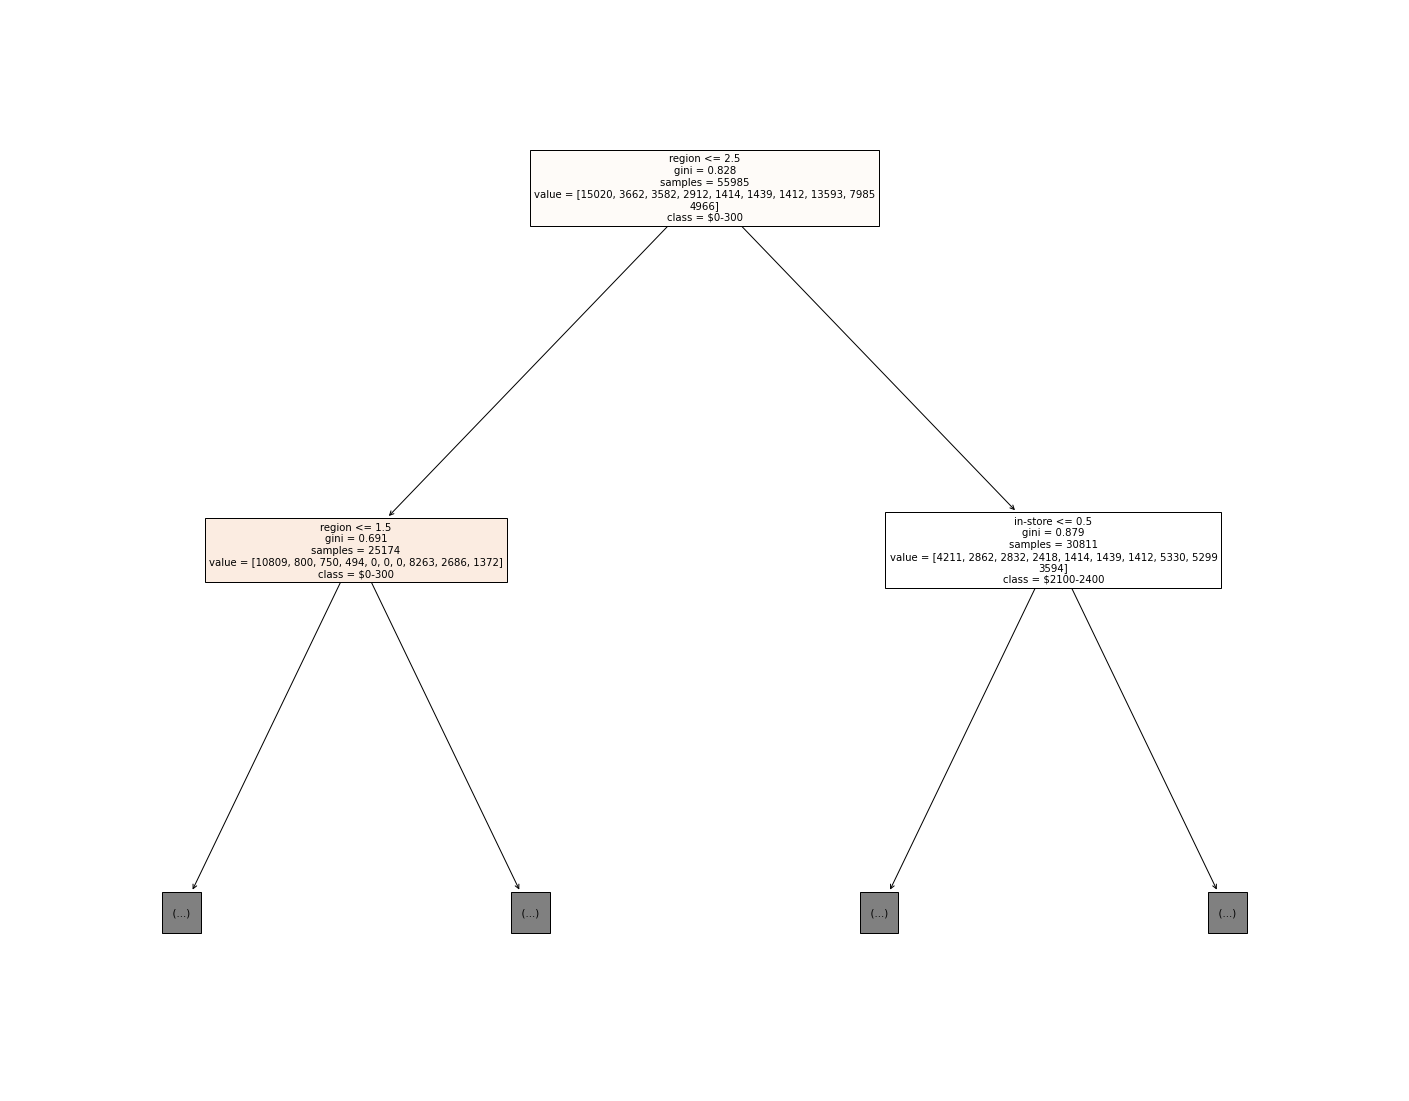

In [202]:
fig = plt.figure(figsize=(25,20))

tree = plot_tree(model, feature_names=X.columns, class_names=["$0-300", "$300-600", "$600-900", "$900-1200", "$1200-1500", "$1500-1800", "$1800-2100", "$2100-2400", "$2400-2700", "$2700-3000"], filled=True, max_depth=1)

### Model: RandomForestClassifier

In [204]:
algo = RandomForestClassifier(n_estimators=5)

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds, zero_division=True))


              precision    recall  f1-score   support

      $0-300       0.49      0.55      0.52      6533
  $1200-1500       0.13      0.13      0.13      1522
  $1500-1800       0.13      0.12      0.12      1569
  $1800-2100       0.11      0.07      0.09      1215
  $2100-2400       0.10      0.09      0.10       600
  $2400-2700       0.10      0.08      0.09       607
  $2700-3000       0.12      0.13      0.12       598
    $300-600       0.25      0.24      0.24      5691
    $600-900       0.23      0.29      0.26      3474
   $900-1200       0.14      0.10      0.11      2185

    accuracy                           0.28     23994
   macro avg       0.18      0.18      0.18     23994
weighted avg       0.27      0.28      0.27     23994



### Model: GradientBoostingClassifier

In [109]:
algo = GradientBoostingClassifier()

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds, zero_division=True))


              precision    recall  f1-score   support

           0       0.61      0.57      0.59      6533
           1       0.25      0.27      0.26      5691
           2       0.22      0.31      0.25      3474
           3       0.12      0.05      0.07      2185
           4       0.13      0.16      0.15      1522
           5       0.13      0.08      0.10      1569
           6       0.14      0.09      0.11      1215
           8       0.11      0.09      0.10       600
           9       0.11      0.19      0.14       607
          10       0.10      0.07      0.08       598

    accuracy                           0.30     23994
   macro avg       0.19      0.19      0.18     23994
weighted avg       0.30      0.30      0.29     23994



# Using "items" as the depedent variable 

In [205]:
# have to readjust the "feature space" to avoid over-fitting and incorrect model development(s)

# here we remove the "items" variable so that it is the dependent variable

X = data.iloc[:, [0, 1, 3, 4]]
X.head()

,in-store,age,amount,region
0,0,37,281.03,2
1,0,35,219.51,2
2,1,45,1525.70,4
3,1,46,715.25,3
4,1,33,1937.50,1


In [206]:
# there are a range of 9 items, starting from 0 and ending in 8, hence the bins value and labels values 

data["items_bin"] = pd.cut(data["items"], bins=9, labels=["0", "1", "2", "3", "4", "5", "6", "7", "8"] )

y = data["items_bin"]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [208]:
algo = DecisionTreeClassifier()

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds, zero_division=True))

              precision    recall  f1-score   support

           0       0.08      0.08      0.08      1738
           1       0.15      0.15      0.15      3416
           2       0.14      0.15      0.14      3444
           3       0.14      0.14      0.14      3505
           5       0.15      0.15      0.15      3351
           6       0.15      0.15      0.15      3414
           7       0.14      0.13      0.13      3396
           8       0.07      0.07      0.07      1730

    accuracy                           0.13     23994
   macro avg       0.13      0.13      0.13     23994
weighted avg       0.13      0.13      0.13     23994



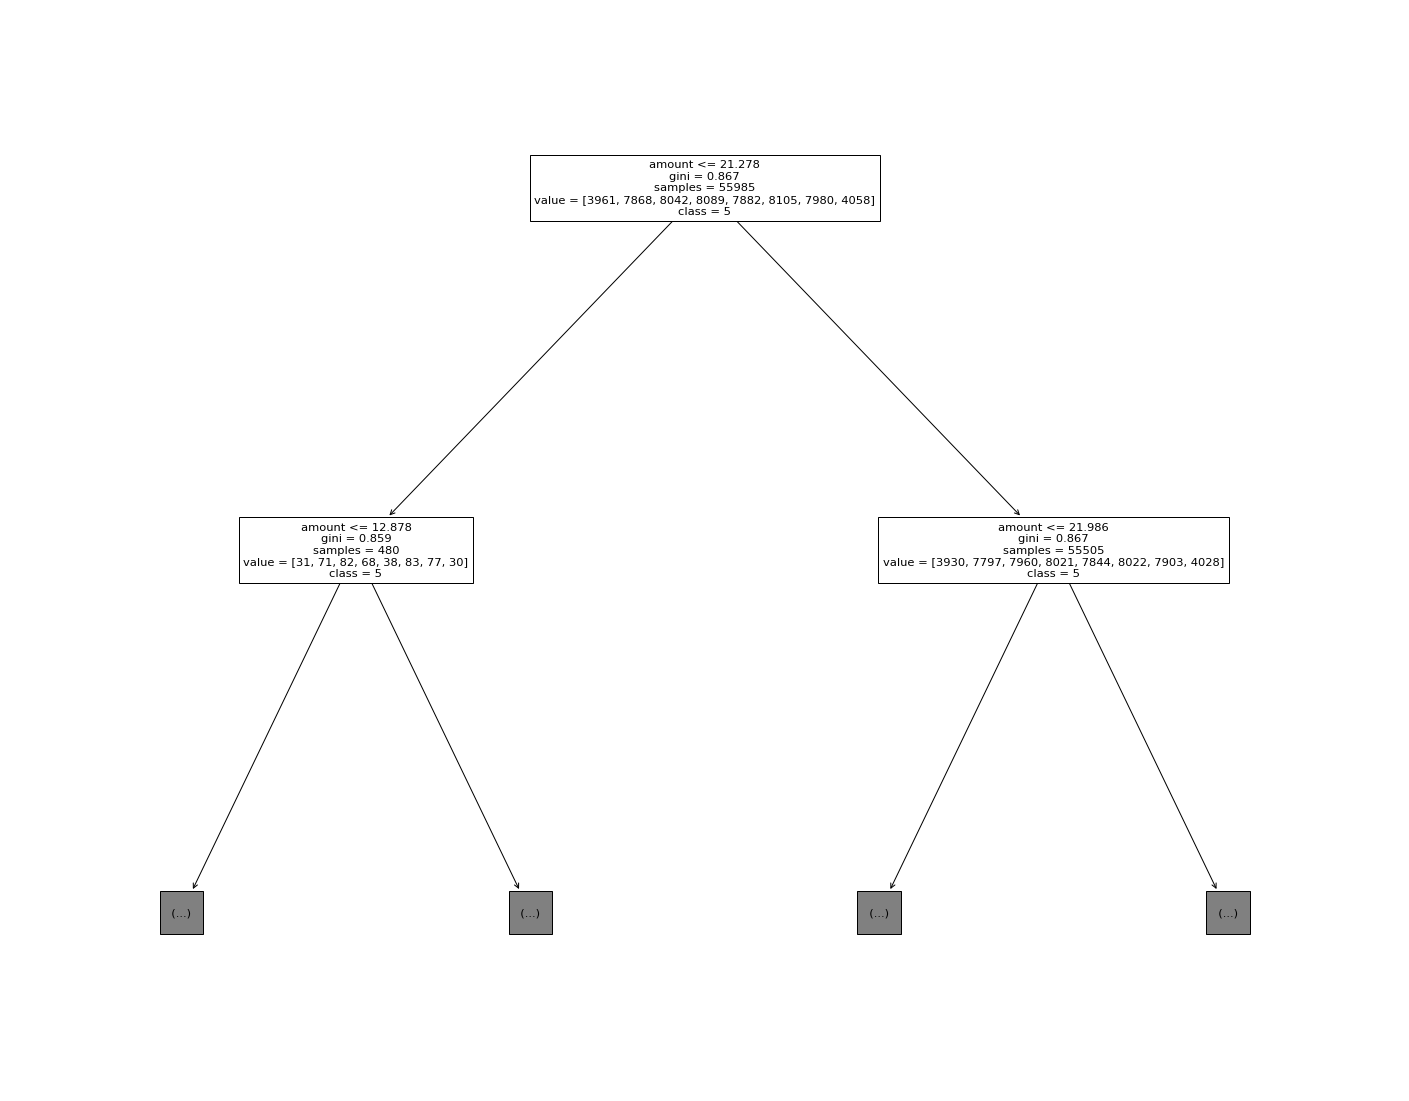

In [209]:
fig = plt.figure(figsize=(25,20))

tree = plot_tree(model, feature_names=X.columns, class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8"], filled=True, max_depth=1)

### Model: RandomForestClassifier

In [213]:
algo = RandomForestClassifier(n_estimators=5)

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

report_1 = classification_report(y_test, preds, zero_division=True)

print(report_1)

              precision    recall  f1-score   support

           0       0.08      0.09      0.08      1738
           1       0.14      0.16      0.15      3416
           2       0.13      0.15      0.14      3444
           3       0.15      0.15      0.15      3505
           5       0.14      0.13      0.13      3351
           6       0.15      0.14      0.14      3414
           7       0.15      0.13      0.14      3396
           8       0.08      0.06      0.07      1730

    accuracy                           0.13     23994
   macro avg       0.13      0.13      0.13     23994
weighted avg       0.13      0.13      0.13     23994



### Model: GradientBoostingClassifier

In [214]:
algo = GradientBoostingClassifier()

model = algo.fit(X_train, y_train)

preds = model.predict(X_test)

report_2 = classification_report(y_test, preds, zero_division=True)

print(report_2)

              precision    recall  f1-score   support

           0       0.18      0.00      0.01      1738
           1       0.14      0.09      0.11      3416
           2       0.14      0.19      0.16      3444
           3       0.15      0.21      0.18      3505
           5       0.14      0.14      0.14      3351
           6       0.15      0.23      0.18      3414
           7       0.14      0.15      0.15      3396
           8       0.09      0.00      0.00      1730

    accuracy                           0.15     23994
   macro avg       0.14      0.13      0.12     23994
weighted avg       0.14      0.15      0.13     23994



In [223]:
# print("RandomForestClassifier - Report", "\n\n", report_1, "\n\n", "GradientBoostingClassifier - Report", "\n\n", report_2)